Name : Alviya Ali
PRN : 24070243005

In [ ]:
TOPIC : FACE MASK DETECTION

In [4]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [7]:
DIRECTORY = r"/content/drive/MyDrive/Face Mask Detection"
CATEGORIES = ["with_mask", "without_mask"]

In [8]:
print("[INFO] loading images...")

[INFO] loading images...


In [22]:
data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [23]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

<ipython-input-23-b461ed456395>:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights="imagenet", include_top=False,


In [20]:
print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [ ]:
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_477']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5889 - loss: 0.7265 - val_accuracy: 0.9562 - val_loss: 0.2133
Epoch 2/20
 1/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9062 - loss: 0.3509

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 641ms/step - accuracy: 0.9062 - loss: 0.3509 - val_accuracy: 0.9562 - val_loss: 0.2056
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9523 - loss: 0.2527 - val_accuracy: 0.9562 - val_loss: 0.1726
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step - accuracy: 0.9688 - loss: 0.1614 - val_accuracy: 0.9562 - val_loss: 0.1722
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9456 - loss: 0.2193 - val_accuracy: 0.9562 - val_loss: 0.1634
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 337ms/step - accuracy: 1.0000 - loss: 0.0355 - val_accuracy: 0.9562 - val_loss: 0.1629
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9537 - loss: 0.2069 - val_accuracy: 0.9562 - val_loss: 0.1521
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 642ms/step - accuracy: 0.8750 - loss: 0.5155 - val_accuracy: 0.9562 - val_loss: 0.1512
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9535 - loss: 0.1837 - val_accuracy: 0.9562 - val_loss: 

In [25]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

[INFO] evaluating network...
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


In [26]:
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.93      0.19      0.32       131
without_mask       0.04      0.67      0.07         6

    accuracy                           0.21       137
   macro avg       0.48      0.43      0.19       137
weighted avg       0.89      0.21      0.31       137



In [28]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("mask_detector.keras")  # or .h5
print("[INFO] Model saved successfully!")

[INFO] saving mask detector model...
[INFO] Model saved successfully!


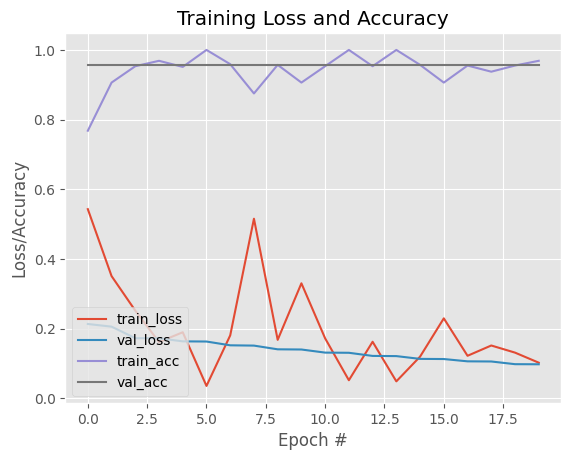

In [29]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")